In [21]:
from tensorflow import keras

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import image_utils as ps
from loss import bce_dice_loss,dice_coef

## Load test image

In [76]:
image_dir = '/content/Clip_final_hlaing_thar_yar11.jpg'
image = np.array(Image.open(image_dir))
print(image.shape)
image= image[:,:,:3]
print('Final Chopped image shape',image.shape)

(2631, 3735, 3)
Final Chopped image shape (2631, 3735, 3)


## Resize image if necessary

original height= 2631, original width = 3735
new height = 1841, new width = 2614


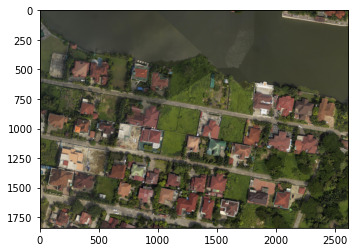

In [77]:
resize = True

scale = 0.7

if resize:
    image = ps.resize_image(image, percent = scale)
    
plt.imshow(image)

## Pad and crop image

In [78]:
model_input_w = 512
model_input_h = 512

# pad & crop
padded_image = ps.pad(image, model_input_w, model_input_h)
cropped_tiles = ps.crop(padded_image, model_input_w, model_input_h, numpy_output=True)

image width =  2614 , image height =  1841
pad width =  458 , pad height =  207


## Load model

In [79]:
model = keras.models.load_model('/content/model_20_epochs.h5',custom_objects={ 'bce_dice_loss': bce_dice_loss, 'dice_coef':dice_coef}) #Load BCE loss from loss.py into model

/usr/local/lib/python3.7/dist-packages/keras/layers/core.py:1045: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


## Inference

In [80]:
model_predictions = model.predict(cropped_tiles,verbose=1)

preds = np.squeeze(model_predictions)

threshold = 0.95
preds = preds > threshold
#preds =np.argmax(preds[0],axis=-1)
print(preds.shape)


1/1 [==============================] - 9s 9s/step
(24, 512, 512)


## Reconstruct final predicted image

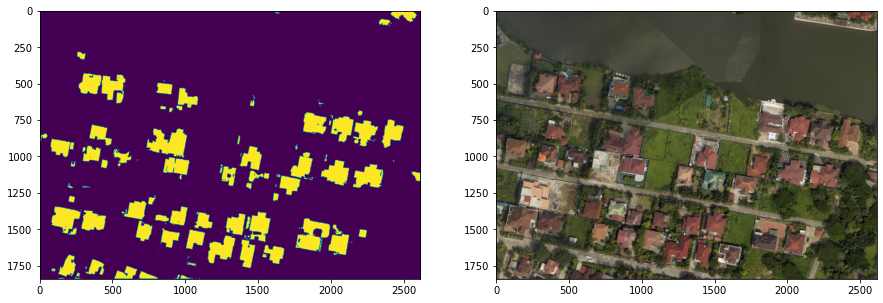

In [81]:
img_h, img_w = image.shape[:2]

predicted_image = ps.reconstruct(preds, img_w, img_h, model_input_w, model_input_h, numpy_output = False)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(predicted_image)
plt.subplot(222)
plt.imshow(image)

## Save image

In [ ]:
# folder for saving output files by model
output_folder = '/content/outputs/'

predicted_image_save_dir = f'{output_folder}/png/predicted_image.png'

# save predicted image in outpus folder
predicted_image.save(predicted_image_save_dir)